# Ансамблевые модели

## Задача классификации 

В этом практическом задании вы научитесь работать с ансамблевыми моделями. Мы начнем с задачи классификации итальянского вина на предмет его пренадлежности к одному из трех видов. Загрузите датасет `Wine Data Database` с помощью функции `load_wine` из модуля `sklearn.datasets`.

In [60]:
from sklearn.datasets import load_wine

X, y = load_wine(return_X_y=True)

Модель случайного леса для классификации представлена классом `RandomForestClassifier` из модуля `sklearn.ensemble`. Конструктор этого класса содержит аргумент `n_estimators`, который соответствует колличеству базовых алгоритмов в случайном лесе. Целью этого задания будет настройка этого параметра. Сравните модели случайных лесов с различным числом базовых алгоритмов `{1, 5, 10, 20}`. Что происходит с качеством случайного леса на тестовых данных при увеличении этого числа? Ответом на это задание `answer1` является лучшая оценка качества модели, округленная до трех знаков после запятой. Используйте `accuracy` как метрику качества и скользящий контроль `cross_val_score` как метод оценки качества модели. Установите параметр `cv = StratifiedKFold(4)`. Возьмите среднее значение оценки качества. Для каждой из моделей случайного леса используете `random_state=42` при создании нового экземпляра.

### *РЕШЕНИЕ*

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np
from matplotlib import pyplot as plt

cv = StratifiedKFold(4)
cvs_list = []

cvs_depend = {}

for n in [1, 5, 10, 20]:
    forest = RandomForestClassifier(random_state=42, n_estimators=n)
    model = forest.fit(X, y)
    cvs = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
    cvs_list.append(cvs)
    cvs_depend[n] = round(cvs, 3)
    
answer1 = round(max(cvs_list), 3)
print(answer1)

0.972


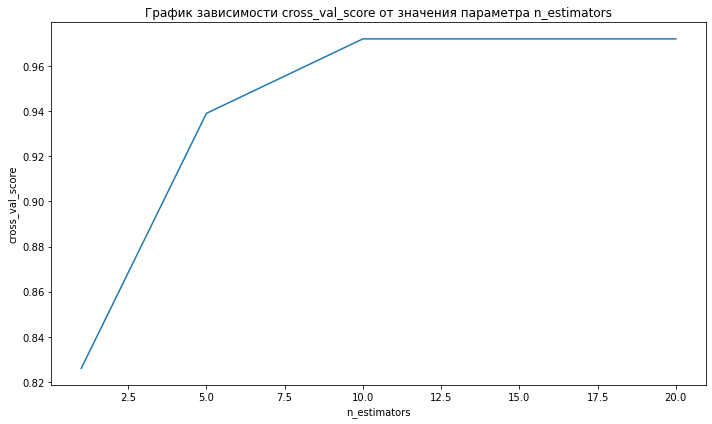

In [73]:
plt.figure(figsize=(10,6))
plt.plot([i for i in cvs_depend.keys()], [i for i in cvs_depend.values()])

plt.title('График зависимости cross_val_score от значения параметра n_estimators',)
plt.xlabel('n_estimators')
plt.ylabel('cross_val_score')
plt.tight_layout()

Далее сравните модель градиентного бустинга `GradientBoostingClassifier` из `sklearn.ensemble` с логистической регрессией `LogisticRegression` из `sklearn.linear_model` на этой выборке. Используете параметр `random_state=42` при создании экземпляров классов. Какая из моделей работает лучше? Приведите лучшую оценку, округленную до трех знаков после запятой, в качестве ответа `answer2` на это задание. Какие выводы из этого можно сделать?

### *РЕШЕНИЕ*

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

grad = GradientBoostingClassifier(random_state=42)
logc_regress = LogisticRegression(random_state=42)

grad_model = grad.fit(X, y)
logc_model = logc_regress.fit(X, y)

grad_cvs = cross_val_score(grad_model, X, y, cv=cv, scoring='accuracy').mean()
logc_cvs = cross_val_score(logc_model, X, y, cv=cv, scoring='accuracy').mean()

answer2 = round(max(grad_cvs, logc_cvs), 3)
answer2

C:\Users\insta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\insta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

0.956

## Задача регрессии

Загрузите уже известную вам выборку `Boston House Prices` и разделите ее случайным образом на тренировочную и тестовую выборку. Для этого используете функцию `train_test_split` с параметрами `random_state=54` и `test_size=0.33`. Мы будем сравнивать 4 модели: `RandomForestRegressor`, `GradientBoostingRegressor` из `sklearn.ensemble`, а так же Гребневую регрессию и ЛАССО (`Ridge`, `Lasso` из `sklearn.linear_model`). Обучите каждую модель на тренировочной выборке с параметром `random_state=42` в конструкторе. Какая из моделей показывает наименьшее значение среднеквадратической ошибки на тестовых данных? В качестве ответа `answer3` приведите это значение, округленное до двух цифр после запятой.

### *РЕШЕНИЕ*

In [75]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

boston = load_boston()

X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, test_size=0.33, random_state=54)

In [76]:
ridge_model = Ridge(random_state=42).fit(X_train, y_train)
lasso_model = Lasso(random_state=42).fit(X_train, y_train)
forest_model = RandomForestRegressor(random_state=42).fit(X_train, y_train)
grad_model = GradientBoostingRegressor(random_state=42).fit(X_train, y_train)

In [77]:
mse_dict = {}

for model in [ridge_model, lasso_model, forest, grad_model]:
    prediction = model.predict(X_test)
    mse = mean_squared_error(prediction, y_test)
    mse_dict[model] = mse
    
answer3 = round(min(mse_dict.values()), 2)
answer3
mse_dict

{Ridge(random_state=42): 23.79571605553146,
 Lasso(random_state=42): 26.917061689676295,
 RandomForestClassifier(n_estimators=20, random_state=42): 545.7449101796407,
 GradientBoostingRegressor(random_state=42): 8.53545069144848}

# Строка с ответами

In [78]:
output = """Best score (random forest) {0:.3f}
Best score (other algorithms) {1:.3f}
Best score (regression) {2:.2f}"""
print(output.format(answer1, answer2, answer3))

Best score (random forest) 0.972
Best score (other algorithms) 0.956
Best score (regression) 8.54
